https://starspot.readthedocs.io/en/latest/tutorials/Tutorial.html

In [1]:
import sys

!which {sys.executable}

/ut3/jerome/miniconda3/envs/starspot/bin/python


In [2]:
import numpy as np
import lightkurve as lk

starname = "TIC 10863087"
lcf = lk.search_lightcurve(starname).download()

/ut3/jerome/miniconda3/envs/starspot/lib/python3.6/site-packages/lightkurve/search.py:352: LightkurveWarning: Warning: 12 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  LightkurveWarning,


/ut3/jerome/miniconda3/envs/starspot/lib/python3.6/site-packages/ipykernel_launcher.py:1: LightkurveDeprecationWarning: The PDCSAP_FLUX function is deprecated and may be removed in a future version.
  """Entry point for launching an IPython kernel.


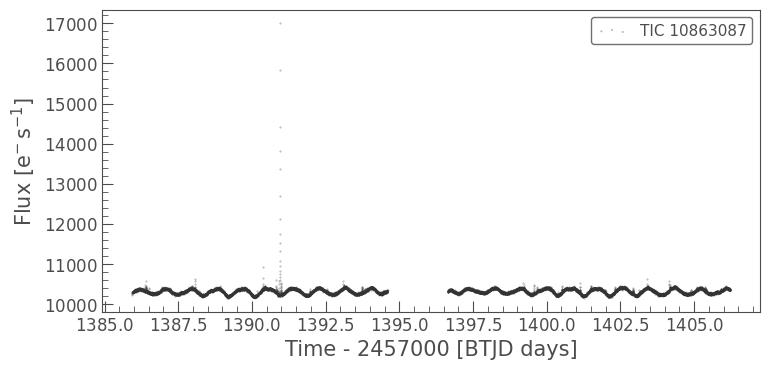

In [3]:
lc = lcf.PDCSAP_FLUX
lc.scatter(alpha=.5, s=.5);

In [6]:
import starspot as ss
import matplotlib.pyplot as plt
%matplotlib inline

# Calculate the median so that we can median-normalize.
med = np.median(lc.flux)

# Do an initial sigma clip to remove big outliers.
m = ss.sigma_clip(lc.flux/med - 1, nsigma=6)
x, y, yerr = lc.time[m], lc.flux[m]/med - 1, lc.flux_err[m]/med

# Then a sigma clip using a Sav-Gol filter for smoothing
mask, smooth = ss.filter_sigma_clip(x, y, window_length=199)

time, flux, flux_err = x[mask], y[mask], yerr[mask]

plt.figure(figsize=(16, 4), dpi=200)
plt.plot(lc.time, lc.flux/med-1, ".", label="Outliers")
plt.plot(time, flux, "k.", label="Clipped")
plt.plot(x, smooth, label="Smoothed light curve")
plt.xlabel("Time [days]")
plt.ylabel("Flux");
plt.ylim(-.02, .02);
plt.legend(loc="lower right", fontsize=15);

WARNING (theano.configdefaults): install mkl with `conda install mkl-service`: No module named 'mkl'


AttributeError: 'TheanoConfigParser' object has no attribute 'gcc__cxxflags'

In [ ]:
import starspot as ss

rotate = ss.RotationModel(time, flux, flux_err)

In [ ]:
rotate.lc_plot()

In [ ]:
ls_period = rotate.ls_rotation()
ls_period

In [ ]:
rotate.ls_plot();